In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.offline as py

In [2]:
df_train = pd.read_csv("./data/train.csv", encoding = "CP949")

In [3]:
df_train.head(2)

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19008 entries, 0 to 19007
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  19008 non-null  object
 1   사용자       19008 non-null  int64 
 2   세션        19008 non-null  int64 
 3   신규방문자     19008 non-null  int64 
 4   페이지뷰      19008 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 742.6+ KB


In [5]:
df_train['DateTime'] = pd.to_datetime(df_train['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

In [6]:
df_train['Date_sub'] = df_train['DateTime'].dt.strftime('%Y-%m-%d')

In [7]:
df_train

,DateTime,사용자,세션,신규방문자,페이지뷰,Date_sub
0,2018-09-09 00:00:00,19,19,8,206,2018-09-09
1,2018-09-09 01:00:00,20,19,9,259,2018-09-09
2,2018-09-09 02:00:00,12,9,1,48,2018-09-09
3,2018-09-09 03:00:00,10,10,2,102,2018-09-09
4,2018-09-09 04:00:00,6,5,3,18,2018-09-09
...,...,...,...,...,...,...
19003,2020-11-08 19:00:00,124,123,19,3128,2020-11-08
19004,2020-11-08 20:00:00,166,159,29,4864,2020-11-08
19005,2020-11-08 21:00:00,184,173,32,3426,2020-11-08
19006,2020-11-08 22:00:00,163,155,34,2845,2020-11-08


In [8]:
df_train_re = pd.DataFrame(df_train.groupby(['Date_sub']).sum())

In [9]:
df_train_re.head()

,사용자,세션,신규방문자,페이지뷰
Date_sub,,,,
2018-09-09,281,266,73,1826
2018-09-10,264,247,51,2092
2018-09-11,329,310,58,1998
2018-09-12,300,287,45,2595
2018-09-13,378,344,50,3845


In [10]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [11]:
df_train_re['Date'] = df_train_re.index

In [12]:
df_prophet_user = df_train_re[['Date', '사용자']]
df_prophet_session = df_train_re[['Date', '세션']]
df_prophet_newu = df_train_re[['Date', '신규방문자']]
df_prophet_pagev = df_train_re[['Date', '페이지뷰']]

In [13]:
df_prophet_user = df_prophet_user.rename(columns={ 'Date': 'ds',
                                               '사용자': 'y' })
df_prophet_session = df_prophet_session.rename(columns={ 'Date': 'ds',
                                               '세션': 'y' })
df_prophet_newu = df_prophet_newu.rename(columns={ 'Date': 'ds',
                                               '신규방문자': 'y' })
df_prophet_pagev = df_prophet_pagev.rename(columns={ 'Date': 'ds',
                                               '페이지뷰': 'y' })

In [24]:
m_user = Prophet(
    changepoint_prior_scale=0.7, # increasing it will make the trend more flexible
    changepoint_range=0.9, # place potential changepoints in the first 98% of the time series    
    yearly_seasonality=True,    
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)

m_user.fit(df_prophet_user)

future = m_user.make_future_dataframe(periods=61)
forecast_user = m_user.predict(future)


m_session = Prophet(
    changepoint_prior_scale=0.7, # increasing it will make the trend more flexible
    changepoint_range=0.9, # place potential changepoints in the first 98% of the time series
    yearly_seasonality=True,    
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)

m_session.fit(df_prophet_session)

future = m_session.make_future_dataframe(periods=61)
forecast_session = m_session.predict(future)


m_newu = Prophet(
    changepoint_prior_scale=0.7, # increasing it will make the trend more flexible
    changepoint_range=0.9, # place potential changepoints in the first 98% of the time series
    yearly_seasonality=True,    
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)

m_newu.fit(df_prophet_newu)

future = m_newu.make_future_dataframe(periods=61)
forecast_newu = m_newu.predict(future)



m_pagev = Prophet(
    changepoint_prior_scale=0.7, # increasing it will make the trend more flexible
    changepoint_range=0.9, # place potential changepoints in the first 98% of the time series
    yearly_seasonality=True,    
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)

m_pagev.fit(df_prophet_pagev)

future = m_pagev.make_future_dataframe(periods=61)
forecast_pagev = m_pagev.predict(future)

C:\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



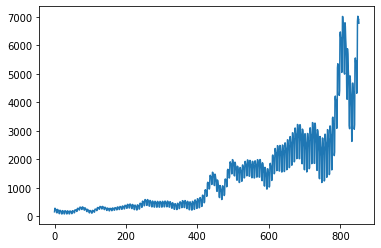

In [25]:
forecast_user.yhat.plot()
plt.show()

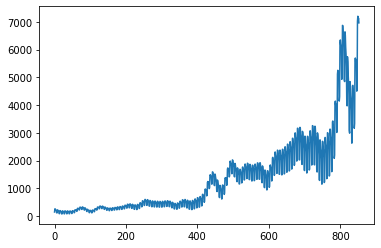

In [26]:
forecast_session.yhat.plot()

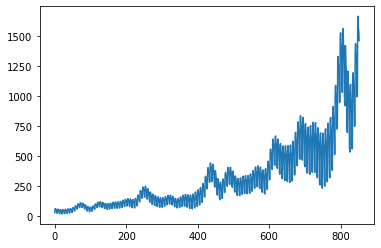

In [27]:
forecast_newu.yhat.plot()

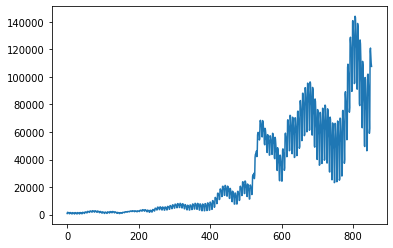

In [28]:
forecast_pagev.yhat.plot()

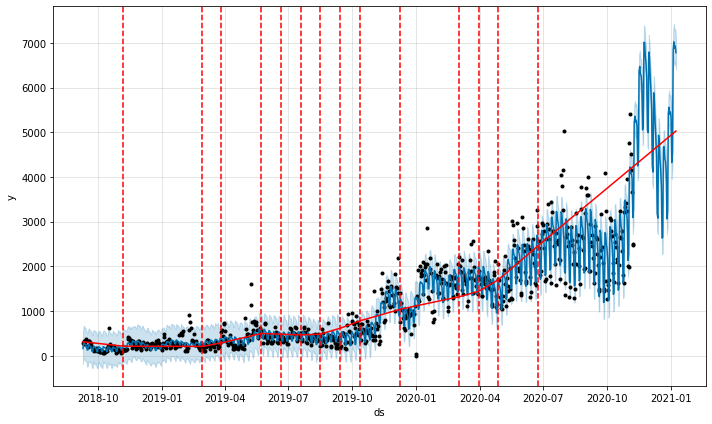

In [29]:
fig = plot_plotly(m_user, forecast_user)
py.iplot(fig) 

fig = m_user.plot(forecast_user)
a = add_changepoints_to_plot(fig.gca(), m_user, forecast_user)
plt.show()

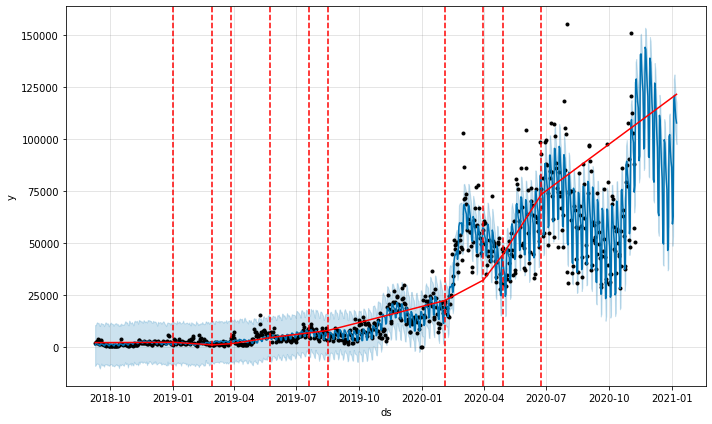

In [30]:
fig = plot_plotly(m_pagev, forecast_pagev)
py.iplot(fig) 

fig = m_pagev.plot(forecast_pagev)
a = add_changepoints_to_plot(fig.gca(), m_pagev, forecast_pagev)
plt.show()

In [31]:
df_sub_example = pd.read_csv("./data/submission.csv",  encoding = "CP949", index_col = 0)

In [32]:
df_sub_example['사용자'] = list(forecast_user['yhat'].tail(61))
df_sub_example['세션'] = list(forecast_session['yhat'].tail(61))
df_sub_example['신규방문자'] = list(forecast_newu['yhat'].tail(61))
df_sub_example['페이지뷰'] = list(forecast_pagev['yhat'].tail(61))

In [33]:
df_sub_example.to_csv('submission_20210102_prophet_1.csv', encoding = "CP949")